# Final Porfolio Project - Provincial Wealth and Exam Grades in Vietnam

## I. Introduction

#### 1.1. Project topic motivation

Growing up in an underdeveloped province in Vietnam, I have witnessed firsthand the stark differences in economic and educational rankings compared to other provinces and cities. This disparity has fueled my curiosity and driven me to explore whether financial wealth correlates with university entrance exam results. My personal experiences and observations have inspired me to delve into this project, aiming to uncover the potential impact of economic conditions on educational outcomes and contribute to a better understanding of how to bridge these gaps. 

#### 1.2. Project objective

The project objective is to analyze university entrance exam (UEE) grade, monthly income per capita and the GINI index across 63 provinces and cities in Vietnam from 2020 to 2022. The details would be explained as the following:

- `University entrance exam (UEE) grade`: is the set of scores that a student receives on standardized exams by Vietnam Ministry of Education, used for admission to universities.
- `Monthly income per capita` : refers to the average income earned by each individual in a given area, such as a province or a city, on a monthly basis. This metric is calculated by dividing the total monthly income of the population by the number of people in that population.
- `The Gini index`:  a measure of inequality in income distribution,  is calculated based on the Lorenz curve, which plots the cumulative share of income received by the cumulative share of the population. (Source: World Bank Databank)
    + The Gini coefficient ranges from 0 to 1 (or 0% to 100% when expressed as a percentage).
        + 0 (or 0%): Perfect equality, where everyone has the same income.
        + 1 (or 100%): Maximum inequality, where one person has all the income, and everyone else has none.
    + Interpretation:
        + Lower Gini Coefficient: Indicates a more equal income distribution.
        + Higher Gini Coefficient: Indicates a more unequal income distribution.
    + Example:
        + A country with a Gini coefficient of 0.25 has relatively low income inequality.
        + A country with a Gini coefficient of 0.60 has high income inequality.
     



#### 1.3. Data collection and source 

The used data are collected as the following table:

In [2]:
import pandas as pd

# Data
data = {
    'Category': ['Economic', 'Economic', 'Economic', 'Grade', 'Grade', 'Grade', 'Social', 'Social', 'Social'],
    'Sub-data': [
        'Average monthly income per capita by source of income and by locality',
        'Average monthly income per capita by source of income and by locality',
        'Average monthly income per capita by source of income and by locality',
        'National High School Exam Scores',
        'National High School Exam Scores',
        'National High School Exam Scores',
        'Gini coefficient by locality',
        'Gini coefficient by locality',
        'Gini coefficient by locality'
    ],
    'Year': [2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022],
    'Source': [
        'www.gso.gov.vn',
        'www.gso.gov.vn',
        'www.gso.gov.vn',
        'https://github.com/ngc-minh/Thu-thap-va-phan-tich-diem-thi-THPT-2020/blob/master/data_ok/all_data_ok.xlsx',
        'https://github.com/chuongmep/THPT_QUOC_GIA_2021/tree/master/Data',
        'https://github.com/anhdung98/diem_thi_2022',
        'www.gso.gov.vn',
        'www.gso.gov.vn',
        'www.gso.gov.vn'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df.head(10)

,Category,Sub-data,Year,Source
0,Economic,Average monthly income per capita by source of...,2020,www.gso.gov.vn
1,Economic,Average monthly income per capita by source of...,2021,www.gso.gov.vn
2,Economic,Average monthly income per capita by source of...,2022,www.gso.gov.vn
3,Grade,National High School Exam Scores,2020,https://github.com/ngc-minh/Thu-thap-va-phan-t...
4,Grade,National High School Exam Scores,2021,https://github.com/chuongmep/THPT_QUOC_GIA_202...
5,Grade,National High School Exam Scores,2022,https://github.com/anhdung98/diem_thi_2022
6,Social,Gini coefficient by locality,2020,www.gso.gov.vn
7,Social,Gini coefficient by locality,2021,www.gso.gov.vn
8,Social,Gini coefficient by locality,2022,www.gso.gov.vn


## II. Project scoping

#### 2.1. Central questions

`Income Data`

1. Which provinces have the highest and lowest income per capita in 2022?
2. What type of income is the highest, and how is each type distributed?
3. How has the income level changed over the years?

`Gini Data`

4. Which provinces have the highest and lowest Gini index?
5. What is the distribution of the Gini index?
6. How have the top 5 provinces with the highest Gini index changed over the years?

`University Entrance Exam Score Data`

7. How has the UEE score distribution changed from 2020 to 2022?
8. Which 10 provinces have the most students with excellent grades (score > 9)?

`Relationships`

9. Is there a relationship between changes in income per capita and changes in the Gini index?
10. Is there a relationship between changes in income per capita and changes in UEE grades?

#### 2.1. Scope

The project will be proceeded through those below steps:
    
- Scope the analysis 
- Prepare data
- Plot & Analyse data
- Evaluation

## III. Project Implementation

### 3.1. Prepare data

#### 3.1.1 `DATA - University entrance exam (UEE) grade`

Upload the files

In [3]:
import pandas as pd
import os

# Read the data of university entrance exam grades 2020, including 62 csv files

# Directory containing the CSV files
directory = '/Users/ducanhtran/Final Porfolio Project/diem thi 2020/'

# List to hold dataframes
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Adjust encoding if needed
        dfs.append(df)

# Concatenate all dataframes
data2020 = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a new CSV file
data2020.to_csv('/Users/ducanhtran/Final Porfolio Project/data2020.csv', index=False)

print(data2020.head())

data2020 = data2020.drop(columns=['Tinh','Nam', 'TongDiem', 'KhoiA', 'KhoiA1', 'KhoiB', 'KhoiC', 'KhoiD', 'MaMonNgoaiNgu'])


data2020 = data2020.rename(columns={'SBD_New':'sbd', 'Toan': 'toan', 'NguVan':'ngu_van', 'VatLy':'vat_li', 'HoaHoc':'hoa_hoc', 'SinhHoc':'sinh_hoc', 'LichSu':'lich_su','DiaLy':'dia_li','GDCD':'gdcd', 'NgoaiNgu':'ngoai_ngu'})
data2020.head()

print(data2020.columns)

neworder = ['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su','dia_li', 'gdcd']
dt2020 = data2020[neworder]
dt2020['year'] = 2020

dt2020.head()

   Nam  Tinh  SBD_New  Toan  NguVan  VatLy  HoaHoc  SinhHoc  LichSu  DiaLy  \
0   20    41        1   3.2    4.75    NaN     NaN      NaN    4.75   6.75   
1   20    41        2   5.6    5.75    NaN     NaN      NaN    2.50   6.00   
2   20    41        3   2.4    3.00    NaN     NaN      NaN    4.00   4.00   
3   20    41        4   4.8    5.50    NaN     NaN      NaN    5.50   6.50   
4   20    41        5   5.8    7.25    4.0     3.5     6.75     NaN    NaN   

   GDCD  NgoaiNgu MaMonNgoaiNgu  TongDiem  KhoiA  KhoiA1  KhoiB  KhoiC  KhoiD  
0   6.0       2.2            N1     27.65    NaN     NaN    NaN  16.25  10.15  
1   6.5       4.0            N1     30.35    NaN     NaN    NaN  14.25  15.35  
2   5.5       2.4            N1     21.30    NaN     NaN    NaN  11.00   7.80  
3   7.0       3.0            N1     32.30    NaN     NaN    NaN  17.50  13.30  
4   NaN       3.4            N1     30.70   13.3    13.2  16.05    NaN  16.45  
Index(['sbd', 'toan', 'ngu_van', 'vat_li', 'hoa_hoc

/var/folders/5s/wrf_n2ln1qnd8mxs6wrc2z6c0000gn/T/ipykernel_1342/3432160088.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2020['year'] = 2020


,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,year
0,1,3.2,4.75,2.2,NaN,NaN,NaN,4.75,6.75,6.0,2020
1,2,5.6,5.75,4.0,NaN,NaN,NaN,2.50,6.00,6.5,2020
2,3,2.4,3.00,2.4,NaN,NaN,NaN,4.00,4.00,5.5,2020
3,4,4.8,5.50,3.0,NaN,NaN,NaN,5.50,6.50,7.0,2020
4,5,5.8,7.25,3.4,4.0,3.5,6.75,NaN,NaN,NaN,2020


Combine the files

In [4]:
dt2020.shape

(870486, 11)

In [5]:
# Read the data of university entrance exam grades 2021
file_path2 = "/Users/ducanhtran/Final Porfolio Project/Diem thi 2021.csv"
dt2021 = pd.read_csv(file_path2)
dt2021 = dt2021.drop(columns=['Unnamed: 10', 'Unnamed: 11'])
dt2021['year'] = 2021
dt2021.head()

# Read the data of university entrance exam grades 2022
file_path3 = "/Users/ducanhtran/Final Porfolio Project/3. Diem thi THPT 2022.csv"
dt2022 = pd.read_csv(file_path3)
dt2022['year'] = 2022
dt2022.head()
dt2022.shape

combine = [dt2020, dt2021, dt2022]

combine_data = pd.concat(combine)
combine_data.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,year
0,1,3.2,4.75,2.2,NaN,NaN,NaN,4.75,6.75,6.0,2020
1,2,5.6,5.75,4.0,NaN,NaN,NaN,2.5,6.0,6.5,2020
2,3,2.4,3.0,2.4,NaN,NaN,NaN,4.0,4.0,5.5,2020
3,4,4.8,5.5,3.0,NaN,NaN,NaN,5.5,6.5,7.0,2020
4,5,5.8,7.25,3.4,4.0,3.5,6.75,NaN,NaN,NaN,2020


In [6]:
dt2021.shape

(925107, 11)

In [54]:
dt2022.shape

(995441, 11)

In [7]:
combine_data['sbd_province'] = combine_data['sbd'].astype(str).str[:2]
combine_data['sbd_province'].astype(int)

0          1
1          2
2          3
3          4
4          5
          ..
995436    64
995437    64
995438    64
995439    64
995440    64
Name: sbd_province, Length: 2791034, dtype: int64

Mapping the province and join tables

In [8]:
# Directory of province
file_path4 = "/Users/ducanhtran/Final Porfolio Project/0. Ma tinh thanh pho - diem thi.csv"
dic = pd.read_csv(file_path4)


dic['Mã'].astype(int)

dic = dic.rename(columns={'Mã':'sbd_province', 'Tỉnh/Thành phố': 'province'})

dic['province'] = dic['province'].str.replace('TỈNH ', '').str.replace('THÀNH PHỐ ', '')
dic.head()

# Convert 'sbd_province' columns to string
dic['sbd_province'] = dic['sbd_province'].astype(str)
combine_data['sbd_province'] = combine_data['sbd_province'].astype(str)

# Merge the DataFrames
alldata = pd.merge(dic, combine_data, on='sbd_province')
alldata = pd.merge(dic, combine_data, on='sbd_province')
alldata.head()

alldata = pd.DataFrame(alldata)

# Convert specified columns to int
columns_to_convert = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
for column in columns_to_convert:
    alldata[column] = pd.to_numeric(alldata[column], errors='coerce')  # Convert to float, setting non-numeric to NaN
    alldata[column] = alldata[column].fillna(-1).astype(int)  # Replace NaN with 0, then convert to int
alldata['year'] = alldata['year'].astype(str)
alldata.dtypes


sbd_province    object
province        object
sbd              int64
toan             int64
ngu_van          int64
ngoai_ngu        int64
vat_li           int64
hoa_hoc          int64
sinh_hoc         int64
lich_su          int64
dia_li           int64
gdcd             int64
year            object
dtype: object

In [9]:
alldata.shape

(2363225, 13)

#### 3.1.2. `DATA - Monthly income per capita`

In [10]:
import pandas as pd

# Path to your Excel file - Income data 2020
filepath1a = '/Users/ducanhtran/Final Porfolio Project/4. TNBQDN 2020.xlsx'

# Read the Excel file
income20 = pd.read_excel(filepath1a)

# Display the first few rows of the dataframe
income20['year']=2020
income20.head()

,province,total,salary,agricultural,nonagricultural,other,year
0,TỔNG SỐ,4249,2357,476,971,446,2020
1,Đồng bằng sông Hồng,5085,3021,309,1194,562,2020
2,Hà Nội,6205,4012,170,1334,690,2020
3,Vĩnh Phúc,4290,2207,407,1306,371,2020
4,Bắc Ninh,5439,2914,224,1791,511,2020


In [11]:
# Path to your Excel file - Income data 2021
filepath2a = '/Users/ducanhtran/Final Porfolio Project/5. TNBQDN 2021.xlsx'

# Read the Excel file
income21 = pd.read_excel(filepath2a)

# Display the first few rows of the dataframe
income21['year']=2021
income21.head()

,province,total,salary,agricultural,nonagricultural,other,year
0,TỔNG SỐ,4205,2383,454,964,404,2021
1,Đồng bằng sông Hồng,5026,3051,283,1187,506,2021
2,Hà Nội,6002,3912,216,1313,560,2021
3,Vĩnh Phúc,4511,2567,402,1221,322,2021
4,Bắc Ninh,4917,2875,185,1475,381,2021


In [12]:
# Path to your Excel file - Income data 2021
filepath3a = '/Users/ducanhtran/Final Porfolio Project/6. TNBQDN 2022.xlsx'

# Read the Excel file
income22 = pd.read_excel(filepath3a)

# Display the first few rows of the dataframe
income22['year']=2022
income22.head()

,province,total,salary,agricultural,nonagricultural,other,year
0,TỔNG SỐ,4673,2577,474,1118,504,2022
1,Đồng bằng sông Hồng,5586,3347,284,1353,603,2022
2,Hà Nội,6423,4182,207,1356,678,2022
3,Vĩnh Phúc,5194,2871,442,1511,369,2022
4,Bắc Ninh,5470,3214,191,1676,389,2022


In [13]:
incomeall = [income20, income21, income22]

incomeall = pd.concat(incomeall)
incomeall.head()

incomeall = incomeall.drop(columns = [])

# List of values to drop
values_to_drop = [
    'Đồng bằng sông Hồng', 'TỔNG SỐ', 'Trung du và miền núi phía Bắc',
    'Bắc Trung Bộ và Duyên hải miền Trung', 'Đồng bằng sông Cửu Long', 'Đông Nam Bộ'
]

# Drop rows where 'province' is in the list of values to drop
incomeall = incomeall[~incomeall['province'].isin(values_to_drop)]
incomeall['province'] = incomeall['province'].str.upper()

incomeall.head()

,province,total,salary,agricultural,nonagricultural,other,year
2,HÀ NỘI,6205,4012,170,1334,690,2020
3,VĨNH PHÚC,4290,2207,407,1306,371,2020
4,BẮC NINH,5439,2914,224,1791,511,2020
5,QUẢNG NINH,4539,2831,523,827,359,2020
6,HẢI DƯƠNG,4388,2554,535,842,457,2020


#### 3.1.3. `DATA - The Gini index`

In [14]:
import pandas as pd

# Path to your Excel file
filepath1b = '/Users/ducanhtran/Final Porfolio Project/7. He so GINI 2020.xlsx'

# Read the Excel file
gini20 = pd.read_excel(filepath1b)

# Display the first few rows of the dataframe
gini20['year']=2020
gini20.head()

,province,gini_score,year
0,TỔNG SỐ,0.373,2020
1,Đồng bằng sông Hồng,0.317,2020
2,Hà Nội,0.341,2020
3,Vĩnh Phúc,0.286,2020
4,Bắc Ninh,0.288,2020


In [15]:
# Path to your Excel file
filepath2b = '/Users/ducanhtran/Final Porfolio Project/8. He so GINI 2021.xlsx'

# Read the Excel file
gini21 = pd.read_excel(filepath2b)

# Display the first few rows of the dataframe
gini21['year']=2021
gini21.head()

,province,gini_score,year
0,TỔNG SỐ,0.374,2021
1,Đồng bằng sông Hồng,0.327,2021
2,Hà Nội,0.359,2021
3,Vĩnh Phúc,0.307,2021
4,Bắc Ninh,0.310,2021


In [16]:
# Path to your Excel file
filepath3b = '/Users/ducanhtran/Final Porfolio Project/9. He so GINI 2022.xlsx'

# Read the Excel file
gini22 = pd.read_excel(filepath3b)

# Display the first few rows of the dataframe
gini22['year']=2022
gini22.head()

,province,gini_score,year
0,TỔNG SỐ,0.375,2022
1,Đồng bằng sông Hồng,0.333,2022
2,Hà Nội,0.346,2022
3,Vĩnh Phúc,0.339,2022
4,Bắc Ninh,0.313,2022


In [17]:
giniall = [gini20, gini21, gini22]

giniall = pd.concat(giniall)
giniall.head()


# List of values to drop
values_to_drop = [
    'Đồng bằng sông Hồng', 'TỔNG SỐ', 'Trung du và miền núi phía Bắc',
    'Bắc Trung Bộ và Duyên hải miền Trung', 'Đồng bằng sông Cửu Long', 'Đông Nam Bộ'
]

# Drop rows where 'province' is in the list of values to drop
giniall = giniall[~giniall['province'].isin(values_to_drop)]
giniall['province'] = giniall['province'].str.upper()

giniall.head()

,province,gini_score,year
2,HÀ NỘI,0.341,2020
3,VĨNH PHÚC,0.286,2020
4,BẮC NINH,0.288,2020
5,QUẢNG NINH,0.309,2020
6,HẢI DƯƠNG,0.271,2020


### 3.2. Plot & analyze data

`Understand the income across provinces`

1. Which provinces have the highest and lowest income per capita?
2. What type of income is the highest, and how is each type distributed?
3. How has the income level changed over the years?

Top 5 provinces having the highest income level in 2022

In [18]:
# 2020

avg_income20 =incomeall[incomeall['year'] == 2020]

avg_income20 = avg_income20.groupby('province').total.mean().round(0).reset_index()

sorted_province_income20 = avg_income20.sort_values(by='total', ascending=False)

# Select the top 5 provinces
top_5_provinces20 = sorted_province_income20.head(5)

print(top_5_provinces20.head())

#2021

avg_income21 =incomeall[incomeall['year'] == 2021]

avg_income21 = avg_income21.groupby('province').total.mean().round(0).reset_index()

sorted_province_income21 = avg_income21.sort_values(by='total', ascending=False)

# Select the top 5 provinces
top_5_provinces21 = sorted_province_income21.head(5)

print(top_5_provinces21.head())


#2022

avg_income22 =incomeall[incomeall['year'] == 2022]

avg_income22 = avg_income22.groupby('province').total.mean().round(0).reset_index()

sorted_province_income = avg_income22.sort_values(by='total', ascending=False)

# Select the top 5 provinces
top_5_provinces22 = sorted_province_income.head(5)

print(top_5_provinces22.head())

           province   total
5       BÌNH  DƯƠNG  7034.0
50  TP. HỒ CHÍ MINH  6537.0
17           HÀ NỘI  6205.0
62         ĐỒNG NAI  5621.0
9          BẮC NINH  5439.0
           province   total
2       BÌNH  DƯƠNG  7123.0
50  TP. HỒ CHÍ MINH  6008.0
17           HÀ NỘI  6002.0
62         ĐỒNG NAI  5751.0
59          ĐÀ NẴNG  5230.0
           province   total
2       BÌNH  DƯƠNG  8076.0
17           HÀ NỘI  6423.0
50  TP. HỒ CHÍ MINH  6392.0
62         ĐỒNG NAI  6346.0
22        HẢI PHÒNG  5897.0


- Binh Duong hold the crown in 3 year in a row
- Ha Noi surpassed Ho Chi Minh in 2022

In [19]:
# 2020

avg_income20 =incomeall[incomeall['year'] == 2020]

avg_income20 = avg_income20.groupby('province').total.mean().round(0).reset_index()

sorted_province_income20 = avg_income20.sort_values(by='total', ascending=False)

# Select the top 5 provinces
top_5_provinces20 = sorted_province_income20.tail(5)

print(top_5_provinces20.head())

#2021

avg_income21 =incomeall[incomeall['year'] == 2021]

avg_income21 = avg_income21.groupby('province').total.mean().round(0).reset_index()

sorted_province_income21 = avg_income21.sort_values(by='total', ascending=False)

# Select the top 5 provinces
top_5_provinces21 = sorted_province_income21.tail(5)

print(top_5_provinces21.head())


#2022

avg_income22 =incomeall[incomeall['year'] == 2022]

avg_income22 = avg_income22.groupby('province').total.mean().round(0).reset_index()

sorted_province_income = avg_income22.sort_values(by='total', ascending=False)

# Select the top 5 provinces
top_5_provinces22 = sorted_province_income.tail(5)

print(top_5_provinces22.head())

     province   total
11   CAO BẰNG  2185.0
27   LAI CHÂU  1905.0
15   HÀ GIANG  1835.0
44     SƠN LA  1745.0
58  ĐIỆN BIÊN  1737.0
     province   total
8     BẮC KẠN  2125.0
27   LAI CHÂU  2050.0
15   HÀ GIANG  1933.0
44     SƠN LA  1834.0
58  ĐIỆN BIÊN  1821.0
     province   total
8     BẮC KẠN  2342.0
27   LAI CHÂU  2212.0
44     SƠN LA  2141.0
58  ĐIỆN BIÊN  2080.0
15   HÀ GIANG  2062.0


- Dien Bien had the lowest income from 2020 to 2021. Since 2022, Ha Giang surpass the Dien Bien to be the poorest province in Vietnam. 

In [20]:
# List of specific provinces to filter
provinces_to_include = ['BÌNH  DƯƠNG', 'HÀ NỘI', 'TP. HỒ CHÍ MINH', 'ĐỒNG NAI', 'HẢI PHÒNG']
top5_2022 = incomeall[incomeall['year']==2022]
top5_2022 = top5_2022[top5_2022['province'].isin(provinces_to_include)]

top5_2022 = top5_2022.sort_values(by='total', ascending=False)
top5_2022.head()

,province,total,salary,agricultural,nonagricultural,other,year
52,BÌNH DƯƠNG,8076,4828,256,2591,402,2022
2,HÀ NỘI,6423,4182,207,1356,678,2022
55,TP. HỒ CHÍ MINH,6392,4317,69,1275,731,2022
53,ĐỒNG NAI,6346,3645,555,1591,554,2022
7,HẢI PHÒNG,5897,3557,247,1375,718,2022


- Binh Duong has the greatest income thanks to both high of salary and nonagricultural income

In [21]:
avg_income = incomeall
avg_income = avg_income.drop(columns=['province'])
avg_income = avg_income.groupby('year').mean().round(0).reset_index()
avg_income.head()

,year,total,salary,agricultural,nonagricultural,other
0,2020,3622.0,1859.0,559.0,817.0,387.0
1,2021,3619.0,1891.0,546.0,831.0,351.0
2,2022,4053.0,2071.0,566.0,984.0,431.0


- There is a slight decrease in income from 2020 to 2021, driven by salary, agriculture and other income. On the other hand, nonagricultural income witnesses a increase by 1.7%.

- From 2021 to 2022, the income got better across types, in which, nonagricultural and other income are the top growth, respectively 18% and 22%.

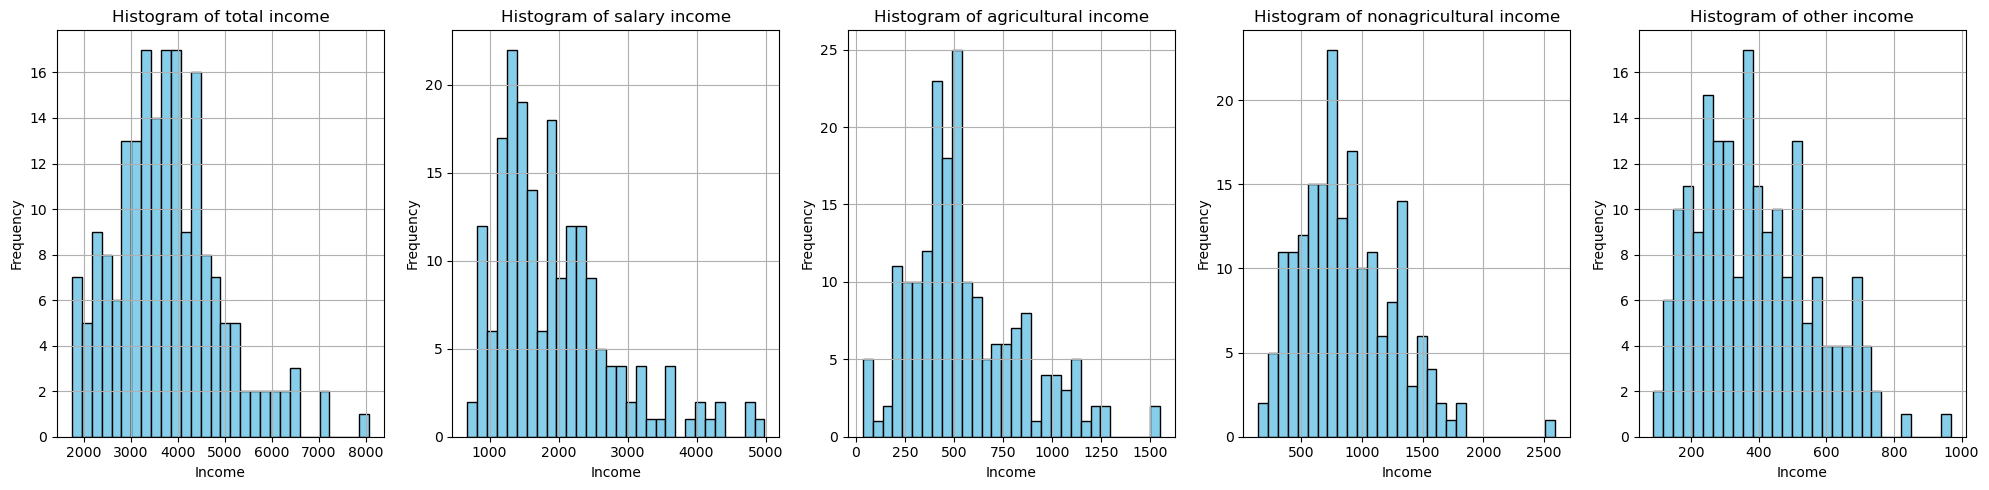

In [22]:
# (1) How is personal income distributed across Vietnam from 2020 to 2022?
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 5 columns - represent for total income and 4 types of income
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Example data for demonstration
data_columns = ['total', 'salary', 'agricultural', 'nonagricultural',
       'other', 'year']  # Replace with actual column names

# Iterate over each subplot and plot a histogram
for ax, col in zip(axes, data_columns):
    data = incomeall[col]  
    ax.hist(data, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {col} income')
    ax.set_xlabel('Income')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()




In [23]:
# Melt the DataFrame to long format
income_long = incomeall.melt(id_vars=['province','year'], value_vars=['salary', 'agricultural', 'nonagricultural', 'other'],
                             var_name='Income type', value_name='Income')

# Display the resulting DataFrame
print(income_long.head())

     province  year Income type  Income
0      HÀ NỘI  2020      salary    4012
1   VĨNH PHÚC  2020      salary    2207
2    BẮC NINH  2020      salary    2914
3  QUẢNG NINH  2020      salary    2831
4   HẢI DƯƠNG  2020      salary    2554


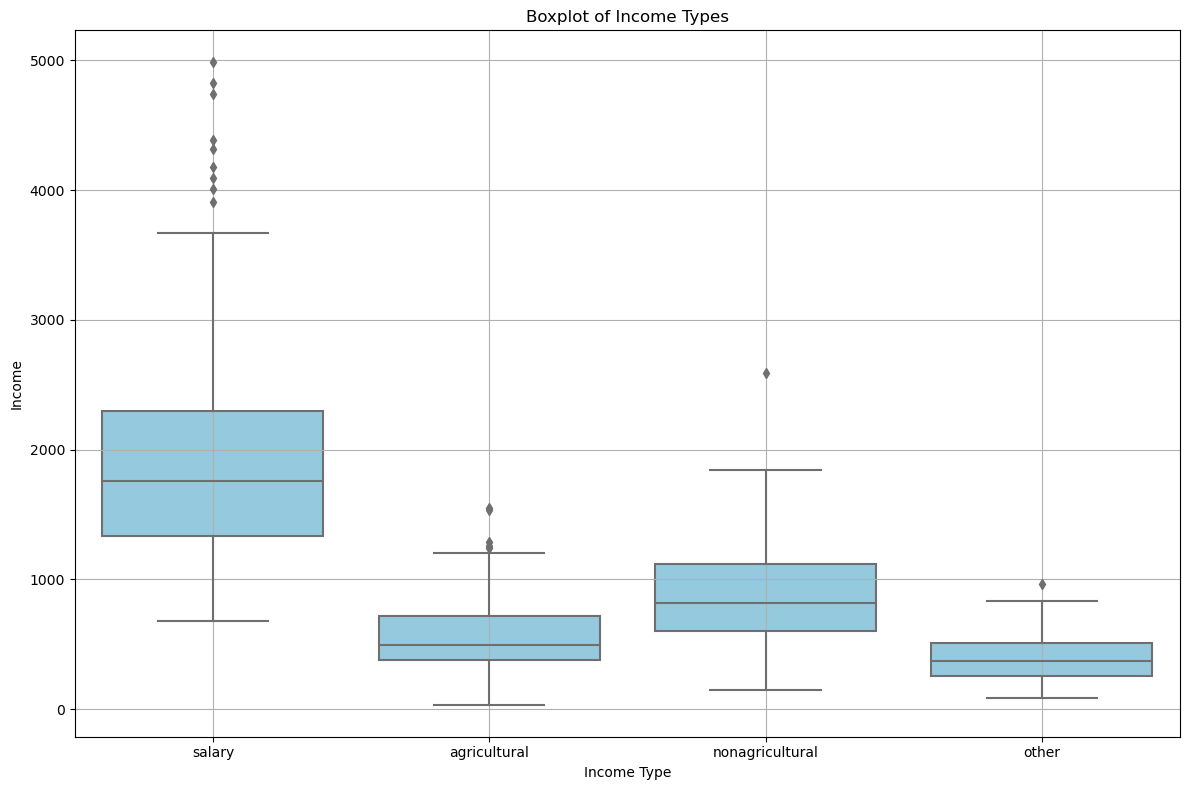

In [24]:
# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income type', y='Income', data=income_long, color='skyblue')
plt.title('Boxplot of Income Types')
plt.xlabel('Income Type')
plt.ylabel('Income')
plt.grid(True)
plt.tight_layout()
plt.show()

- Salary is the highest source of income

`Gini Index`

4. Which provinces have the highest and lowest Gini index?
5. What is the distribution of the Gini index?
6. How have the top 5 provinces with the highest Gini index changed over the years?

In [25]:
#Gini2020
giniall20 = giniall[giniall['year'] == 2020]
giniall20 = giniall20.sort_values(by='gini_score', ascending=False)
print(giniall20.head())

#Gini2021
giniall21 = giniall[giniall['year'] == 2021]
giniall21 = giniall21.sort_values(by='gini_score', ascending=False)
print(giniall21.head())

#Gini2022
giniall22 = giniall[giniall['year'] == 2022]
giniall22 = giniall22.sort_values(by='gini_score', ascending=False)
print(giniall22.head())

     province  gini_score  year
15   CAO BẰNG       0.501  2020
26     SƠN LA       0.469  2020
19    YÊN BÁI       0.468  2020
25   LAI CHÂU       0.455  2020
24  ĐIỆN BIÊN       0.452  2020
     province  gini_score  year
15   CAO BẰNG       0.525  2021
24  ĐIỆN BIÊN       0.501  2021
25   LAI CHÂU       0.496  2021
26     SƠN LA       0.474  2021
14   HÀ GIANG       0.465  2021
    province  gini_score  year
15  CAO BẰNG       0.493  2022
14  HÀ GIANG       0.467  2022
16   BẮC KẠN       0.458  2022
60  TRÀ VINH       0.451  2022
18   LÀO CAI       0.440  2022


- Provinces having high gini index locates in northen area of Vietnam.

In [26]:
#Gini2020
giniall20 = giniall[giniall['year'] == 2020]
giniall20 = giniall20.sort_values(by='gini_score', ascending=False)
print(giniall20.tail())

#Gini2021
giniall21 = giniall[giniall['year'] == 2021]
giniall21 = giniall21.sort_values(by='gini_score', ascending=False)
print(giniall21.tail())

#Gini2022
giniall22 = giniall[giniall['year'] == 2022]
giniall22 = giniall22.sort_values(by='gini_score', ascending=False)
print(giniall22.tail())

           province  gini_score  year
53         ĐỒNG NAI       0.261  2020
42       BÌNH THUẬN       0.259  2020
9         THÁI BÌNH       0.256  2020
55  TP. HỒ CHÍ MINH       0.254  2020
62        ĐỒNG THÁP       0.249  2020
       province  gini_score  year
52  BÌNH  DƯƠNG       0.256  2021
68     BẠC LIÊU       0.234  2021
9     THÁI BÌNH       0.221  2021
11     NAM ĐỊNH       0.207  2021
42   BÌNH THUẬN       0.203  2021
      province  gini_score  year
62   ĐỒNG THÁP       0.298  2022
6    HẢI DƯƠNG       0.297  2022
11    NAM ĐỊNH       0.287  2022
42  BÌNH THUẬN       0.252  2022
9    THÁI BÌNH       0.236  2022


- Binh Thuan and Thai Binh remained its ranking in top 5 having the most equal income distribution from 2020 to 2022, in which, both are position at the top 2 in 2022.

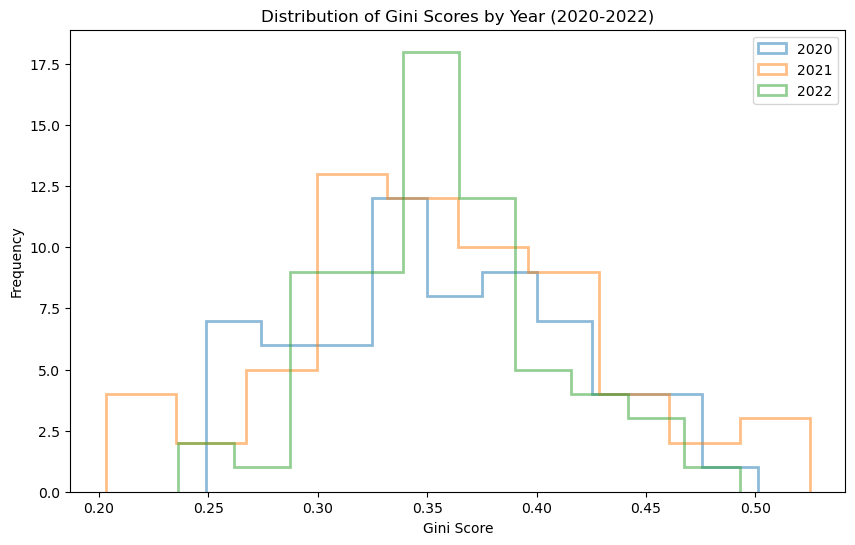

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming giniall is your DataFrame containing Gini data

# Filter data for each year
giniall20 = giniall[giniall['year'] == 2020]['gini_score']
giniall21 = giniall[giniall['year'] == 2021]['gini_score']
giniall22 = giniall[giniall['year'] == 2022]['gini_score']

# Plot the data
plt.figure(figsize=(10, 6))

# Plot histograms as line plots
plt.hist(giniall20, bins=10, alpha=0.5, label='2020', histtype='step', linewidth=2)
plt.hist(giniall21, bins=10, alpha=0.5, label='2021', histtype='step', linewidth=2)
plt.hist(giniall22, bins=10, alpha=0.5, label='2022', histtype='step', linewidth=2)

# Add labels and title
plt.xlabel('Gini Score')
plt.ylabel('Frequency')
plt.title('Distribution of Gini Scores by Year (2020-2022)')
plt.legend(loc='upper right')

# Show the plot
plt.show()


`General Distribution Shape:`

The histogram shows that the Gini scores for the years 2020, 2021, and 2022 follow a roughly bell-shaped distribution. This indicates that most provinces have a Gini score around the central values, with fewer provinces at the extreme ends.

`Year-on-Year Comparison:`
- 2020: The distribution is more spread out compared to other years, with Gini scores ranging from about 0.25 to 0.50. The peak frequency occurs around 0.35.
- 2021: This year has the widest spread of Gini scores, with values ranging from 0.20 to 0.55. The peak is slightly shifted towards higher Gini scores compared to 2020.
- 2022: The Gini scores for this year show a more concentrated distribution, with the majority of scores falling between 0.30 and 0.45. There is a noticeable peak at around 0.35.

`Trends and Changes:`
- Increasing Inequality: The shift in the peak from 2020 to 2022 suggests an increase in income inequality over the years. The 2022 distribution shows higher frequencies at higher Gini scores, indicating that more provinces experienced higher inequality.
- Consistency in 2021: The 2021 distribution appears to be more consistent, with a narrower range of Gini scores. This could suggest that the economic policies or conditions during this year were more uniform across provinces.

`Education`

`University Entrance Exam Score Data`

7. How has the UEE score distribution changed from 2020 to 2022?
8. Top 10 provinces have the most students with excellent grades (total key subject score > 24)?

Question related to geographical distribution would be conducted in Tableau for better visualization.

In [28]:
alldata.head()

,sbd_province,province,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,year
0,1,HÀ NỘI,1,3,4,2,-1,-1,-1,4,6,6,2020
1,1,HÀ NỘI,1,9,5,5,7,8,3,-1,-1,-1,2020
2,1,HÀ NỘI,1,8,7,4,7,8,5,-1,-1,-1,2020
3,1,HÀ NỘI,1,7,5,4,8,6,5,-1,-1,-1,2020
4,1,HÀ NỘI,1,4,2,-1,-1,-1,-1,3,7,-1,2020


In [29]:
keysubject = alldata[alldata['ngoai_ngu'] != -1]

# Check the resulting DataFrame
keysubject.head()

,sbd_province,province,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,year
0,1,HÀ NỘI,1,3,4,2,-1,-1,-1,4,6,6,2020
1,1,HÀ NỘI,1,9,5,5,7,8,3,-1,-1,-1,2020
2,1,HÀ NỘI,1,8,7,4,7,8,5,-1,-1,-1,2020
3,1,HÀ NỘI,1,7,5,4,8,6,5,-1,-1,-1,2020
5,1,HÀ NỘI,1,3,6,3,-1,-1,-1,4,7,8,2020


In [30]:
# Drop rows where 'ngoai_ngu' column has a value of -1
keysubject = alldata[alldata['ngoai_ngu'] != -1].copy()

# Add a new column 'keyscore' by summing up the scores
keysubject.loc[:, 'keyscore'] = keysubject['toan'] + keysubject['ngu_van'] + keysubject['ngoai_ngu']

# Check the resulting DataFrame
keysubject.head()


,sbd_province,province,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,year,keyscore
0,1,HÀ NỘI,1,3,4,2,-1,-1,-1,4,6,6,2020,9
1,1,HÀ NỘI,1,9,5,5,7,8,3,-1,-1,-1,2020,19
2,1,HÀ NỘI,1,8,7,4,7,8,5,-1,-1,-1,2020,19
3,1,HÀ NỘI,1,7,5,4,8,6,5,-1,-1,-1,2020,16
5,1,HÀ NỘI,1,3,6,3,-1,-1,-1,4,7,8,2020,12


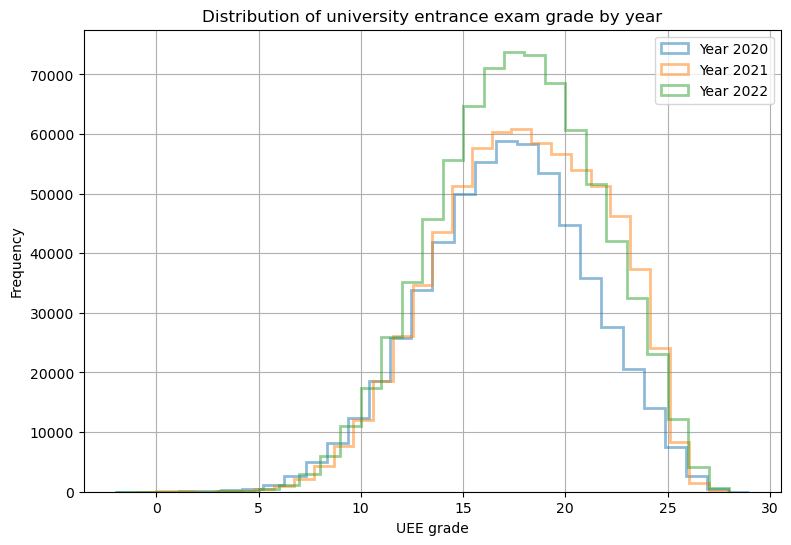

In [55]:
# List of unique years
years = keysubject['year'].unique()

# Plotting the histogram of 'keyscore' by year
plt.figure(figsize=(9, 6))

for year in years:
    plt.hist(keysubject[keysubject['year'] == year]['keyscore'], bins=30, histtype='step', linewidth=2, alpha=0.5, label=f'Year {year}')

plt.title('Distribution of university entrance exam grade by year')
plt.xlabel('UEE grade')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



`Analysis and Implications Based on the Distribution of UEE Grades by Year`
`Data Overview`
The dataset comprises keyscore (sum of scores in subjects such as math, literature, and foreign language) for university entrance exams across three years: 2020, 2021, and 2022.
The histogram displays the frequency distribution of these scores for each year.

`Observations`
Overall Distribution Shape:
The histograms for all three years are roughly bell-shaped, indicating a normal distribution of grades with some skewness.
This suggests that most students score around the middle range, with fewer students achieving very high or very low scores.

`Peak (Mode) Analysis:`
The peaks of the distributions (modes) appear to be around the 15-20 range for each year.
The mode remains consistent across the years, suggesting that the central tendency of scores hasn't significantly shifted.

`Spread (Variance):`
The spread of the histograms indicates the variability in scores.
2021 appears to have a slightly wider spread compared to 2020 and 2022, which might indicate more variability in student performance in that year.

`Skewness:`
All three histograms show some degree of left skewness (longer left tail), indicating that there are more students with lower scores than higher scores.
The skewness is more pronounced in 2021 compared to 2020 and 2022.

`Outliers:`
There are fewer scores in the extreme high and low ends of the distribution.
This is typical in educational assessments where the majority of students cluster around the mean with fewer outliers.

`Comparative Analysis by Year:`
2020: The distribution is slightly tighter, suggesting less variability in scores.
2021: Shows a wider distribution, indicating higher variability. This could be due to changes in exam difficulty, preparation strategies, or other external factors.
2022: The distribution is again tighter but shows a slight increase in scores compared to 2020.

In [32]:
yeargrade = keysubject.groupby('year').keyscore.mean()
yeargrade.head()

year
2020    16.975867
2021    18.032694
2022    17.141274
Name: keyscore, dtype: float64

In [33]:
print(keysubject['year'].unique())


['2020' '2021' '2022']


In [34]:
#Excellent students

excellent_student = keysubject[keysubject['keyscore']>24]
excellent_student = excellent_student[excellent_student['year'] == '2022']
excellent_student.head()

,sbd_province,province,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,year,keyscore
152936,10,LẠNG SƠN,1000048,8,8,9,-1,-1,-1,8,6,9,2022,25
152942,10,LẠNG SƠN,1000054,8,8,9,-1,-1,-1,8,8,9,2022,25
152964,10,LẠNG SƠN,1000077,8,8,9,-1,-1,-1,8,7,8,2022,25
152968,10,LẠNG SƠN,1000082,9,9,8,-1,-1,-1,7,6,8,2022,26
152973,10,LẠNG SƠN,1000087,8,8,9,-1,-1,-1,6,6,8,2022,25


In [35]:
print(excellent_student.columns)

Index(['sbd_province', 'province', 'sbd', 'toan', 'ngu_van', 'ngoai_ngu',
       'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd', 'year',
       'keyscore'],
      dtype='object')


In [36]:
excellent_student = excellent_student.groupby('province')['keyscore'].count().reset_index()
# Rename the column for better understanding
excellent_student.columns = ['Province', 'Number of Excellent Students']
excellent_student = excellent_student.sort_values(by='Number of Excellent Students', ascending=False)
excellent_student.head()

,Province,Number of Excellent Students
25,LẠNG SƠN,4183
15,HÀ TĨNH,2017
39,THANH HÓA,962
27,NGHỆ AN,911
26,NAM ĐỊNH,716


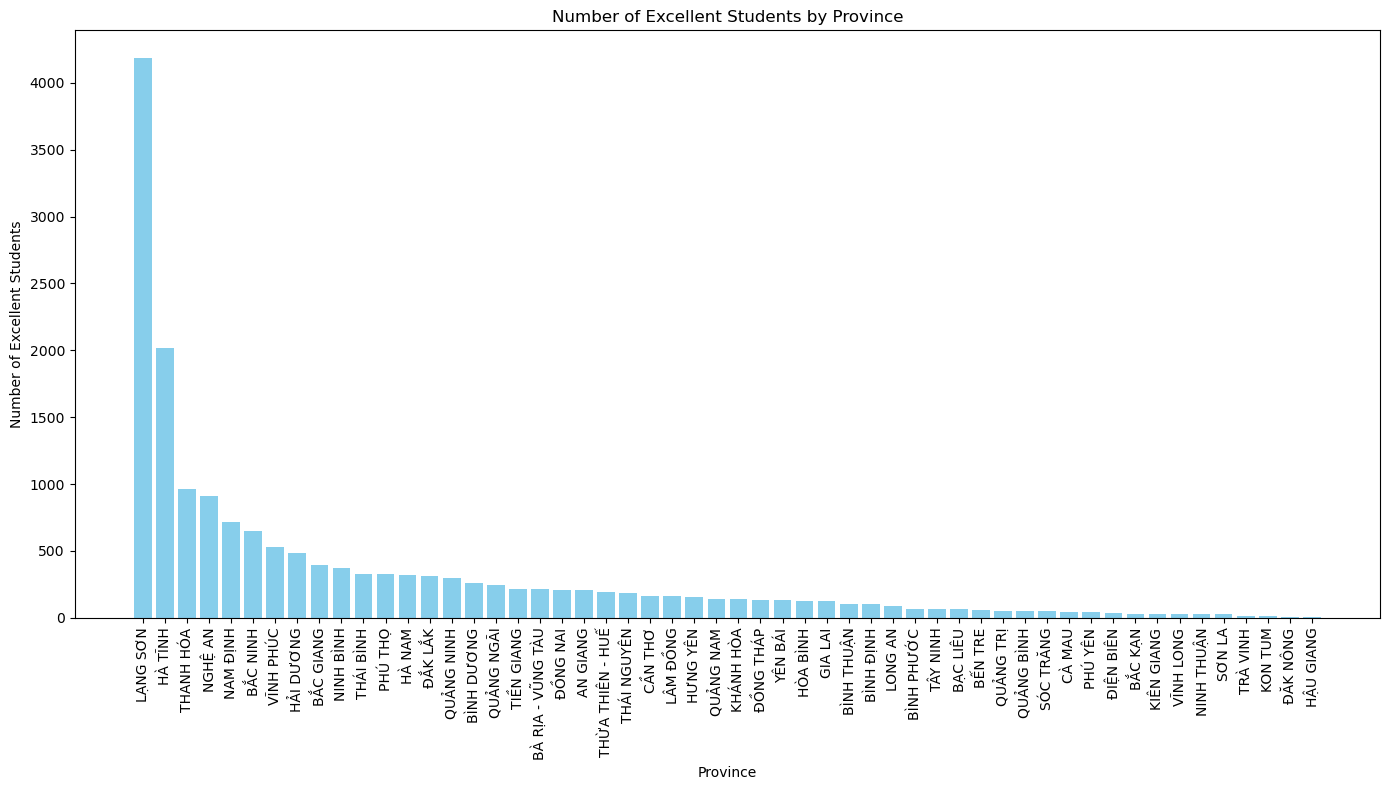

In [37]:
import matplotlib.pyplot as plt

# Plotting the number of excellent students by province
plt.figure(figsize=(14, 8))
plt.bar(excellent_student['Province'], excellent_student['Number of Excellent Students'], color='skyblue')
plt.title('Number of Excellent Students by Province')
plt.xlabel('Province')
plt.ylabel('Number of Excellent Students')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

- Lang Son, Ha Tinh, Thanh Hoa, Nam Dinh are top 4 provinces having the most exellent students over the years.

`Relationships`

9. Is there a relationship between changes in income per capita and changes in the Gini index?
10. Is there a relationship between changes in income per capita and changes in UEE grades?

In [38]:
keysubject.head()

,sbd_province,province,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,year,keyscore
0,1,HÀ NỘI,1,3,4,2,-1,-1,-1,4,6,6,2020,9
1,1,HÀ NỘI,1,9,5,5,7,8,3,-1,-1,-1,2020,19
2,1,HÀ NỘI,1,8,7,4,7,8,5,-1,-1,-1,2020,19
3,1,HÀ NỘI,1,7,5,4,8,6,5,-1,-1,-1,2020,16
5,1,HÀ NỘI,1,3,6,3,-1,-1,-1,4,7,8,2020,12


In [39]:
import pandas as pd

# Create DataFrames with selected columns
income_df = incomeall[['province', 'year', 'total']].copy()
gini_df = giniall[['province', 'year', 'gini_score']].copy()
uee_df = keysubject[['province', 'year', 'keyscore']].copy()

# Convert 'year' to string
income_df.loc[:, 'year'] = income_df['year'].astype(str)
gini_df.loc[:, 'year'] = gini_df['year'].astype(str)
uee_df.loc[:, 'year'] = uee_df['year'].astype(str)

# Calculate year-over-year percentage change
income_df['income_change'] = income_df.groupby('province')['total'].pct_change() * 100
gini_df['gini_change'] = gini_df.groupby('province')['gini_score'].pct_change() * 100
uee_df['grade_change'] = uee_df.groupby('province')['keyscore'].pct_change() * 100

# Merge DataFrames for Income & Gini
income_gini_df = pd.merge(income_df, gini_df[['province', 'year', 'gini_change']], on=['province', 'year'], how='inner')
# Merge DataFrames for Income & Grade
income_grade_df = pd.merge(income_df, uee_df[['province', 'year', 'grade_change']], on=['province', 'year'], how='inner')

# Handle NaN values resulting from pct_change calculation
income_gini_df.dropna(subset=['income_change', 'gini_change'], inplace=True)
income_grade_df.dropna(subset=['income_change', 'grade_change'], inplace=True)

# Classify the changes as 'Increase' or 'Decrease' for Income & Gini
income_gini_df['income_trend'] = income_gini_df['income_change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')
income_gini_df['gini_trend'] = income_gini_df['gini_change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# Classify the changes as 'Increase' or 'Decrease' for Income & Grade
income_grade_df['income_trend'] = income_grade_df['income_change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')
income_grade_df['grade_trend'] = income_grade_df['grade_change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# Count the occurrences of each combination for Income & Gini
relationship_summary_gini = income_gini_df.groupby(['income_trend', 'gini_trend']).size().reset_index(name='count')
# Count the occurrences of each combination for Income & Grade
relationship_summary_grade = income_grade_df.groupby(['income_trend', 'grade_trend']).size().reset_index(name='count')

# Pivot the summary to get a more readable format for Income & Gini
relationship_summary_gini_pivot = relationship_summary_gini.pivot_table(index=['income_trend'], columns=['gini_trend'], values='count', fill_value=0)
# Pivot the summary to get a more readable format for Income & Grade
relationship_summary_grade_pivot = relationship_summary_grade.pivot_table(index=['income_trend'], columns=['grade_trend'], values='count', fill_value=0)

# Display the summaries
print("Relationship between Income & Gini:")
print(relationship_summary_gini_pivot)

print("\nRelationship between Income & Grade:")
print(relationship_summary_grade_pivot)


Relationship between Income & Gini:
gini_trend    Decrease  Increase
income_trend                    
Decrease          13.0      10.0
Increase          47.0      51.0

Relationship between Income & Grade:
grade_trend   Decrease  Increase
income_trend                    
Decrease      120915.0  101878.0
Increase      589875.0  492870.0


In [40]:
import pandas as pd
import scipy.stats as stats

# Create DataFrames with selected columns
income_df = incomeall[['province', 'year', 'total']].copy()
gini_df = giniall[['province', 'year', 'gini_score']].copy()
uee_df = keysubject[['province', 'year', 'keyscore']].copy()

# Convert 'year' to string
income_df.loc[:, 'year'] = income_df['year'].astype(str)
gini_df.loc[:, 'year'] = gini_df['year'].astype(str)
uee_df.loc[:, 'year'] = uee_df['year'].astype(str)

# Calculate year-over-year percentage change
income_df['income_change'] = income_df.groupby('province')['total'].pct_change() * 100
gini_df['gini_change'] = gini_df.groupby('province')['gini_score'].pct_change() * 100
uee_df['grade_change'] = uee_df.groupby('province')['keyscore'].pct_change() * 100

# Merge DataFrames for Income & Gini
income_gini_df = pd.merge(income_df, gini_df[['province', 'year', 'gini_change']], on=['province', 'year'], how='inner')
# Merge DataFrames for Income & Grade
income_grade_df = pd.merge(income_df, uee_df[['province', 'year', 'grade_change']], on=['province', 'year'], how='inner')

# Handle NaN values resulting from pct_change calculation
income_gini_df.dropna(subset=['income_change', 'gini_change'], inplace=True)
income_grade_df.dropna(subset=['income_change', 'grade_change'], inplace=True)

# Classify the changes as 'Increase' or 'Decrease' for Income & Gini
income_gini_df['income_trend'] = income_gini_df['income_change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')
income_gini_df['gini_trend'] = income_gini_df['gini_change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# Classify the changes as 'Increase' or 'Decrease' for Income & Grade
income_grade_df['income_trend'] = income_grade_df['income_change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')
income_grade_df['grade_trend'] = income_grade_df['grade_change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# Create contingency tables
contingency_gini = pd.crosstab(income_gini_df['income_trend'], income_gini_df['gini_trend'])
contingency_grade = pd.crosstab(income_grade_df['income_trend'], income_grade_df['grade_trend'])

# Perform chi-square test for Income & Gini
chi2_gini, p_gini, dof_gini, ex_gini = stats.chi2_contingency(contingency_gini)
print(f"Chi-square test for Income & Gini:\nChi2 Statistic: {chi2_gini}, p-value: {p_gini}")

# Perform chi-square test for Income & Grade
chi2_grade, p_grade, dof_grade, ex_grade = stats.chi2_contingency(contingency_grade)
print(f"Chi-square test for Income & Grade:\nChi2 Statistic: {chi2_grade}, p-value: {p_grade}")


Chi-square test for Income & Gini:
Chi2 Statistic: 0.25750290315698643, p-value: 0.6118409072627866
Chi-square test for Income & Grade:
Chi2 Statistic: 3.1910589341229105, p-value: 0.07404203471541877


`Analysis of Chi-Square Test Results:`

1. Income & Gini:
- Chi2 Statistic: 0.25750290315698643
- p-value: 0.6118409072627866

*Interpretation:
- The chi-square statistic is quite low (0.2575), indicating a small difference between the observed and expected frequencies in the contingency table.
- The p-value is 0.6118, which is significantly higher than the typical significance level of 0.05.

> Conclusion:
> Since the p-value is greater than 0.05, we fail to reject the null hypothesis.
> This means that there is no statistically significant relationship between the increase/decrease in income per capita and the increase/decrease in the Gini index. In other words, changes in income per capita do not appear to be associated with changes in the Gini index based on the given data.

2. Income & Grade:
- Chi2 Statistic: 3.1910589341229105
- p-value: 0.07404203471541877
* Interpretation:
- The chi-square statistic is 3.1911, indicating some difference between the observed and expected frequencies in the contingency table.
- The p-value is 0.0740, which is slightly above the typical significance level of 0.05.

> Conclusion:
> Since the p-value is slightly above 0.05, we do not have enough evidence to reject the null hypothesis at the 5% significance level.
> However, the p-value is relatively close to 0.05, suggesting a trend towards significance. This implies that there might be a weak association between the increase/decrease in income per capita and the increase/decrease in UEE grade, but it is not strong enough to be considered statistically significant with the given data.


> ## `Summary`:
Income & Gini: No significant relationship. Changes in income per capita do not appear to be associated with changes in the Gini index.
Income & Grade: No significant relationship at the 5% level, but there is a trend that suggests a potential weak association. Further investigation with more data or a different significance threshold might provide more insights.
Recommendations:


*Further Data Collection:

- Collect more data to increase the sample size, which may provide more power to detect significant relationships if they exist.
Investigate Other Factors:
- Explore other factors that might influence the relationship between income and Gini index or UEE grades.
Refine Analysis:
- Consider using additional statistical tests or methods to further explore potential relationships.
- Use different significance levels or thresholds if the context allows for it (e.g., 10% significance level).

### 3.3. `Further next-steps`

#### 3.3.1. Combine all data for Tableau visualization

In [41]:
keysubject.head()
# List of columns to drop
columns_to_drop = ['sbd', 'sbd_province','vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

# Drop the columns
keysubject = keysubject.drop(columns=columns_to_drop)

# Display the updated DataFrame
keysubject.head()


,province,toan,ngu_van,ngoai_ngu,year,keyscore
0,HÀ NỘI,3,4,2,2020,9
1,HÀ NỘI,9,5,5,2020,19
2,HÀ NỘI,8,7,4,2020,19
3,HÀ NỘI,7,5,4,2020,16
5,HÀ NỘI,3,6,3,2020,12


`Combine all data (grade, gini index, income across provinces)`

In [42]:
import pandas as pd

# Assuming keysubject, giniall, and incomeall are your DataFrames
# Ensure the 'year' column is present and correctly typed
keysubject['year'] = keysubject['year'].astype(int)
giniall['year'] = giniall['year'].astype(int)
incomeall['year'] = incomeall['year'].astype(int)

# Step 1: Group by 'province' and 'year' to calculate averages
columns_for_avg = ['province', 'year', 'toan', 'ngu_van', 'ngoai_ngu', 'keyscore']
gradeall = keysubject[columns_for_avg].groupby(['province', 'year']).mean().round(0).reset_index()

# Step 2: Merge the DataFrames
masterdata = pd.merge(gradeall, giniall, on=['province', 'year'], how='outer')
masterdata = pd.merge(masterdata, incomeall, on=['province', 'year'], how='outer')

# Display the resulting DataFrame
masterdata.head()


,province,year,toan,ngu_van,ngoai_ngu,keyscore,gini_score,total,salary,agricultural,nonagricultural,other
0,AN GIANG,2020,6.0,6.0,4.0,17.0,0.323,3338.0,1371.0,513.0,946.0,508.0
1,AN GIANG,2021,7.0,7.0,6.0,19.0,0.356,3406.0,1439.0,505.0,1033.0,429.0
2,AN GIANG,2022,6.0,7.0,5.0,18.0,0.350,3646.0,1556.0,499.0,1079.0,511.0
3,BÀ RỊA - VŨNG TÀU,2020,6.0,6.0,4.0,17.0,0.387,4610.0,2824.0,415.0,972.0,399.0
4,BÀ RỊA - VŨNG TÀU,2021,7.0,6.0,6.0,19.0,0.388,4419.0,2734.0,310.0,1124.0,252.0


In [43]:
print(masterdata['province'].nunique())

81


In [44]:
print(masterdata['province'].unique())

['AN GIANG' 'BÀ RỊA - VŨNG TÀU' 'BÌNH DƯƠNG' 'BÌNH PHƯỚC' 'BÌNH THUẬN'
 'BÌNH ĐỊNH' 'BẠC LIÊU' 'BẮC GIANG' 'BẮC KẠN' 'BẮC NINH' 'BẾN TRE'
 'CAO BẰNG' 'CÀ MAU' 'CẦN THƠ' 'GIA LAI' 'HÀ GIANG' 'HÀ NAM' 'HÀ NỘI'
 'HÀ TĨNH' 'HÒA BÌNH' 'HƯNG YÊN' 'HẢI DƯƠNG' 'HẢI PHÒNG' 'HẬU GIANG'
 'HỒ CHÍ MINH' 'KHÁNH HÒA' 'KIÊN GIANG' 'KON TUM' 'LAI CHÂU' 'LONG AN'
 'LÀO CAI' 'LÂM ĐỒNG' 'LẠNG SƠN' 'NAM ĐỊNH' 'NGHỆ AN' 'NINH BÌNH'
 'NINH THUẬN' 'PHÚ THỌ' 'PHÚ YÊN' 'QUẢNG BÌNH' 'QUẢNG NAM' 'QUẢNG NGÃI'
 'QUẢNG NINH' 'QUẢNG TRỊ' 'SÓC TRĂNG' 'SƠN LA' 'THANH HÓA' 'THÁI BÌNH'
 'THÁI NGUYÊN' 'THỪA THIÊN - HUẾ' 'TIỀN GIANG' 'TRÀ VINH' 'TUYÊN QUANG'
 'TÂY NINH' 'VĨNH LONG' 'VĨNH PHÚC' 'YÊN BÁI' 'ĐIỆN BIÊN' 'ĐÀ NẴNG'
 'ĐĂK NÔNG' 'ĐẮK LẮK' 'ĐỒNG NAI' 'ĐỒNG THÁP' 'THÁI  NGUYÊN'
 'THỪA THIÊN-HUẾ' 'QUẢNG  NAM' 'QUẢNG  NGÃI' 'KHÁNH  HÒA' 'NINH  THUẬN'
 'TÂY NGUYÊN' 'ĐẮK NÔNG' 'BÌNH  DƯƠNG' 'TP. HỒ CHÍ MINH' 'KIÊN  GIANG'
 'THÁI\xa0 NGUYÊN' 'QUẢNG\xa0 NAM' 'QUẢNG\xa0 NGÃI' 'KHÁNH\xa0 HÒA'
 'NINH\xa0 THUẬN' 'BÌNH\xa0 DƯƠN

In [45]:
# Create a dictionary to map incorrect province names to correct names
province_corrections = {
    'THÁI  NGUYÊN': 'THÁI NGUYÊN',
    'THỪA THIÊN-HUẾ': 'THỪA THIÊN - HUẾ',
    'QUẢNG  NAM': 'QUẢNG NAM',
    'QUẢNG  NGÃI': 'QUẢNG NGÃI',
    'KHÁNH  HÒA': 'KHÁNH HÒA',
    'NINH  THUẬN': 'NINH THUẬN',
    'TÂY NGUYÊN': 'TÂY NINH',
    'ĐẮK NÔNG': 'ĐĂK NÔNG',
    'BÌNH  DƯƠNG': 'BÌNH DƯƠNG',
    'TP. HỒ CHÍ MINH': 'HỒ CHÍ MINH',
    'KIÊN  GIANG': 'KIÊN GIANG',
    'THÁI\xa0 NGUYÊN': 'THÁI NGUYÊN',
    'QUẢNG\xa0 NAM': 'QUẢNG NAM',
    'QUẢNG\xa0 NGÃI': 'QUẢNG NGÃI',
    'KHÁNH\xa0 HÒA': 'KHÁNH HÒA',
    'NINH\xa0 THUẬN': 'NINH THUẬN',
    'BÌNH\xa0 DƯƠNG': 'BÌNH DƯƠNG',
    'KIÊN\xa0 GIANG': 'KIÊN GIANG'
}

# Apply the mapping to the 'province' column in each DataFrame
keysubject['province'] = keysubject['province'].replace(province_corrections)
giniall['province'] = giniall['province'].replace(province_corrections)
incomeall['province'] = incomeall['province'].replace(province_corrections)

# Step 1: Group by 'province' and 'year' to calculate averages
columns_for_avg = ['province', 'year', 'toan', 'ngu_van', 'ngoai_ngu', 'keyscore']
gradeall = keysubject[columns_for_avg].groupby(['province', 'year']).mean().round(0).reset_index()

# Step 2: Merge the DataFrames using an outer join to ensure all data is included
masterdata = pd.merge(gradeall, giniall, on=['province', 'year'], how='outer')
masterdata = pd.merge(masterdata, incomeall, on=['province', 'year'], how='outer')

# Display the resulting DataFrame
masterdata.head()


,province,year,toan,ngu_van,ngoai_ngu,keyscore,gini_score,total,salary,agricultural,nonagricultural,other
0,AN GIANG,2020,6.0,6.0,4.0,17.0,0.323,3338,1371,513,946,508
1,AN GIANG,2021,7.0,7.0,6.0,19.0,0.356,3406,1439,505,1033,429
2,AN GIANG,2022,6.0,7.0,5.0,18.0,0.350,3646,1556,499,1079,511
3,BÀ RỊA - VŨNG TÀU,2020,6.0,6.0,4.0,17.0,0.387,4610,2824,415,972,399
4,BÀ RỊA - VŨNG TÀU,2021,7.0,6.0,6.0,19.0,0.388,4419,2734,310,1124,252


In [46]:
print(masterdata['province'].nunique())

63


In [47]:
# Save the combined_data DataFrame to a CSV file
masterdata.to_csv('/Users/ducanhtran/Final Porfolio Project/masterdata.csv', index=False)


`UEE grade data`

In [48]:
# Define a function to classify student rank based on keyscore
def classify_rank(score):
    if score >= 9.0:
        return 'Excellent'
    elif score >= 8.0:
        return 'Very Good'
    elif score >= 7.0:
        return 'Good'
    elif score >= 6.0:
        return 'Fair'
    elif score >= 5.0:
        return 'Average'
    else:
        return 'Poor'

# Adjust the keyscore by dividing it by 3
keysubject['adjusted_keyscore'] = keysubject['keyscore'] / 3

# Apply the function to create a new column 'rank' based on the adjusted_keyscore
keysubject['rank'] = keysubject['adjusted_keyscore'].apply(classify_rank)

# Display the updated DataFrame
keysubject.head()



,province,toan,ngu_van,ngoai_ngu,year,keyscore,adjusted_keyscore,rank
0,HÀ NỘI,3,4,2,2020,9,3.000000,Poor
1,HÀ NỘI,9,5,5,2020,19,6.333333,Fair
2,HÀ NỘI,8,7,4,2020,19,6.333333,Fair
3,HÀ NỘI,7,5,4,2020,16,5.333333,Average
5,HÀ NỘI,3,6,3,2020,12,4.000000,Poor


In [49]:
print(keysubject['province'].unique())

['HÀ NỘI' 'HỒ CHÍ MINH' 'HẢI PHÒNG' 'ĐÀ NẴNG' 'HÀ GIANG' 'CAO BẰNG'
 'LAI CHÂU' 'LÀO CAI' 'TUYÊN QUANG' 'LẠNG SƠN' 'BẮC KẠN' 'THÁI NGUYÊN'
 'YÊN BÁI' 'SƠN LA' 'PHÚ THỌ' 'VĨNH PHÚC' 'QUẢNG NINH' 'BẮC GIANG'
 'BẮC NINH' 'HẢI DƯƠNG' 'HƯNG YÊN' 'HÒA BÌNH' 'HÀ NAM' 'NAM ĐỊNH'
 'THÁI BÌNH' 'NINH BÌNH' 'THANH HÓA' 'NGHỆ AN' 'HÀ TĨNH' 'QUẢNG BÌNH'
 'QUẢNG TRỊ' 'THỪA THIÊN - HUẾ' 'QUẢNG NAM' 'QUẢNG NGÃI' 'KON TUM'
 'BÌNH ĐỊNH' 'GIA LAI' 'PHÚ YÊN' 'ĐẮK LẮK' 'KHÁNH HÒA' 'LÂM ĐỒNG'
 'BÌNH PHƯỚC' 'BÌNH DƯƠNG' 'NINH THUẬN' 'TÂY NINH' 'BÌNH THUẬN' 'ĐỒNG NAI'
 'LONG AN' 'ĐỒNG THÁP' 'AN GIANG' 'BÀ RỊA - VŨNG TÀU' 'TIỀN GIANG'
 'KIÊN GIANG' 'CẦN THƠ' 'BẾN TRE' 'VĨNH LONG' 'TRÀ VINH' 'SÓC TRĂNG'
 'BẠC LIÊU' 'CÀ MAU' 'ĐIỆN BIÊN' 'ĐĂK NÔNG' 'HẬU GIANG']


In [50]:
print(keysubject['province'].nunique())

63


In [51]:
# Save the combined_data DataFrame to a CSV file
keysubject.to_csv('/Users/ducanhtran/Final Porfolio Project/keysubject.csv', index=False)

In [52]:
import pandas as pd

# Melt the specified columns into row values
income_long = incomeall.melt(id_vars=['province', 'year'], 
                             value_vars=['salary', 'agricultural', 'nonagricultural', 'other'],
                             var_name='Income Type', 
                             value_name='Income')

# Display the resulting DataFrame
print(income_long.head())


     province  year Income Type  Income
0      HÀ NỘI  2020      salary    4012
1   VĨNH PHÚC  2020      salary    2207
2    BẮC NINH  2020      salary    2914
3  QUẢNG NINH  2020      salary    2831
4   HẢI DƯƠNG  2020      salary    2554


In [53]:
# Save the combined_data DataFrame to a CSV file
income_long.to_csv('/Users/ducanhtran/Final Porfolio Project/incometype.csv', index=False)

#### 3.3.2. Create deck for project summary

- Create powerpoint presentation deck after finishing the visulization on dashboard